# Import libraries

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pip install category_encoders
!pip install xgboost

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import  make_scorer
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

# Load data

In [78]:
data=pd.read_csv('/content/drive/MyDrive/Dataset for ML/prj DS kì 1 năm 3/last data.csv',na_values=['nan'])

In [79]:
data.head(20)

,Hãng,Dòng xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Nhiên liệu,Dung tích,Số chỗ,Giá (triệu)
0,peugeot,2008,2022,Xe đã dùng,30000.0,Trong nước,SUV /Crossover,Số tự động,Xăng,1.2,5.0,679
1,mercedes benz,cclass,2014,Xe đã dùng,90000.0,Trong nước,Sedan,Số tự động,Xăng,3.0,5.0,499
2,mercedes benz,eclass,2022,Xe đã dùng,500.0,Trong nước,Sedan,Số tự động,Xăng,2.0,5.0,2229
3,mercedes benz,cclass,2021,Xe đã dùng,80.0,Trong nước,Sedan,Số tự động,Xăng,1.5,5.0,1399
4,mercedes benz,eclass,2022,Xe đã dùng,8888.0,Trong nước,Sedan,Số tự động,Xăng,2.0,5.0,1788
5,peugeot,3008,2022,Xe đã dùng,10000.0,Trong nước,SUV /Crossover,Số tự động,Xăng,1.6,5.0,979
6,mercedes benz,cclass,2022,Xe đã dùng,500.0,Trong nước,Sedan,Số tự động,Xăng,2.0,5.0,2109
7,peugeot,3008,2022,Xe đã dùng,16000.0,Trong nước,SUV /Crossover,Số tự động,Xăng,1.6,5.0,889
8,kia,morning,2022,Xe đã dùng,10000.0,Trong nước,Hatchback,Số tự động,Xăng,1.2,5.0,338
9,peugeot,3008,2022,Xe đã dùng,10000.0,Trong nước,SUV /Crossover,Số tự động,Xăng,1.6,5.0,979


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38052 entries, 0 to 38051
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hãng          38051 non-null  object 
 1   Dòng xe       38051 non-null  object 
 2   Năm sản xuất  38051 non-null  object 
 3   Tình trạng    38052 non-null  object 
 4   Số km đã đi   37789 non-null  float64
 5   Xuất xứ       34188 non-null  object 
 6   Kiểu dáng     36905 non-null  object 
 7   Hộp số        38050 non-null  object 
 8   Nhiên liệu    38049 non-null  object 
 9   Dung tích     37069 non-null  float64
 10  Số chỗ        36754 non-null  float64
 11  Giá (triệu)   38052 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 3.5+ MB


# Data cleaning

# Xử lý dòng xe

In [81]:

data=data[data['Dòng xe'].isnull()==False]
data=data[data['Dòng xe'] != 'cx']
data['Dòng xe'].replace({'luxa':'luxa2.0','luxsa':'luxsa2.0'},inplace=True)
data['Dòng xe'].replace({'new':'newbeetle'},inplace=True)
data['Dòng xe'].replace({'flying':'flyingspur','hi':'hilander','x':'xtrail'},inplace=True)
data=data[data['Hãng'] !='hãng khác']
for h in data['Hãng'].unique():
  if h=='vinfast':
    data['Dòng xe'].replace({'3':'dòngkhác','1083':'dòngkhác'})
data=data[data['Dòng xe'] !='dòngkhác']


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37583 entries, 0 to 38051
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hãng          37583 non-null  object 
 1   Dòng xe       37583 non-null  object 
 2   Năm sản xuất  37583 non-null  object 
 3   Tình trạng    37583 non-null  object 
 4   Số km đã đi   37331 non-null  float64
 5   Xuất xứ       33736 non-null  object 
 6   Kiểu dáng     36799 non-null  object 
 7   Hộp số        37582 non-null  object 
 8   Nhiên liệu    37581 non-null  object 
 9   Dung tích     37027 non-null  float64
 10  Số chỗ        36704 non-null  float64
 11  Giá (triệu)   37583 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 3.7+ MB


In [83]:
'''for i,h in enumerate(data['Hãng'].unique()):
 l=[]
 print(h)
 for j in data['Dòng xe'][data['Hãng']==h].unique():
  l.append(j)
 print(l)
#xóa cx(mazda)
#xóa vf(vinfast), chuyển luxa->lux2.0,luxsa->luxsa2.0,xóa 1083,xóa 3
# volk : new->newbeetle
# landrover :bỏ rangerover
#bentley : flying->flyingspur
#infiniti: xóa qx
#nissan x->xtrail
#isuzu : hi -> hilander
#hãng khác :xóa'''

"for i,h in enumerate(data['Hãng'].unique()):\n l=[]\n print(h)\n for j in data['Dòng xe'][data['Hãng']==h].unique():\n  l.append(j)\n print(l)\n#xóa cx(mazda)\n#xóa vf(vinfast), chuyển luxa->lux2.0,luxsa->luxsa2.0,xóa 1083,xóa 3\n# volk : new->newbeetle\n# landrover :bỏ rangerover\n#bentley : flying->flyingspur\n#infiniti: xóa qx\n#nissan x->xtrail\n#isuzu : hi -> hilander\n#hãng khác :xóa"

## Năm sản xuất cleaning

In [84]:
data['Năm sản xuất'].unique()

array(['2022', '2014', '2021', '2023', '2017', '2016', '2019', '2015',
       '2010', '2020', '2007', '2008', '2009', '2011', '2018', '2013',
       '2012', '1998', '2004', '2001', '2005', '2002', '1996', '2000',
       '2003', '1992', '2006', '1993', '1989', '1999', '1994', '1997',
       '1990', '1995', '1991', '1983', 'trước năm 1980', '1988', '1984',
       '1987', '1986', '1985', '1982'], dtype=object)

In [85]:
data['Năm sản xuất'].replace({'trước năm 1980':'1980'},inplace=True)

## Kiểu dáng cleaning

In [86]:
data['Kiểu dáng'].unique()

array(['SUV /Crossover', 'Sedan', 'Hatchback', 'Bán tải / Pickup',
       'Van/Minivan', 'Coupe', 'Convertible', 'Kiểu dáng khác', nan,
       'SUV / Cross over', 'Pickup'], dtype=object)



*   Bán tải và pickup thực chất đều là 1 nên ta sẽ replace chúng về chung thành Bán tải
*   SUV / Cross over và SUV /Crosser đang bị lỗi format nên ta sẽ replace chung về SUV/Crossover



In [87]:
data['Kiểu dáng'].replace({'SUV /Crossover':'SUV/Crossover','SUV / Cross over':'SUV/Crossover',
                           'Bán tải / Pickup':'Bán tải','Pickup':'Bán tải'},inplace=True)

## Nhiên liệu cleaning

In [88]:
data['Nhiên liệu'].unique()

array(['Xăng', 'Điện', 'Dầu', 'Hybrid', nan, 'Động cơ Hybrid'],
      dtype=object)

In [89]:
data['Nhiên liệu'].replace({'Động cơ Hybrid':'Hybrid'},inplace=True)

# Data Understanding

## Overview data

In [90]:
data=data.reset_index().drop('index',axis=1)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37583 entries, 0 to 37582
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hãng          37583 non-null  object 
 1   Dòng xe       37583 non-null  object 
 2   Năm sản xuất  37583 non-null  object 
 3   Tình trạng    37583 non-null  object 
 4   Số km đã đi   37331 non-null  float64
 5   Xuất xứ       33736 non-null  object 
 6   Kiểu dáng     36799 non-null  object 
 7   Hộp số        37582 non-null  object 
 8   Nhiên liệu    37581 non-null  object 
 9   Dung tích     37027 non-null  float64
 10  Số chỗ        36704 non-null  float64
 11  Giá (triệu)   37583 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 3.4+ MB


dữ liệu gồm 38350 sample với 11 columns trong đó có 10 features và target là "Giá" columns.Bài toán đặt ra là từ đầu vào dưới dạng vector với 10 features chúng ta cần dự đoán ra giá của xe

In [92]:
data.isnull().sum()

Hãng               0
Dòng xe            0
Năm sản xuất       0
Tình trạng         0
Số km đã đi      252
Xuất xứ         3847
Kiểu dáng        784
Hộp số             1
Nhiên liệu         2
Dung tích        556
Số chỗ           879
Giá (triệu)        0
dtype: int64

đa số các features đều có Null trong đó 1 vài trường có số lượng Null khá lớn như Xuất xứ,Kiểu dáng,Dung tích,Số chỗ -> Fill giá trị null.Các trường còn lại Null rất nhỏ và k đáng kể so với tổng số samples -> chúng ta có thể drop

In [93]:
data.dtypes

Hãng             object
Dòng xe          object
Năm sản xuất     object
Tình trạng       object
Số km đã đi     float64
Xuất xứ          object
Kiểu dáng        object
Hộp số           object
Nhiên liệu       object
Dung tích       float64
Số chỗ          float64
Giá (triệu)       int64
dtype: object

có 3 featurs Số km đã đi,Dung tích,Số chỗ là numerical variables còn lại là categorical variables

In [94]:
num_vars=['Số km đã đi','Dung tích','Số chỗ']
dis_var=['Số chỗ']
con_vars=['Số km đã đi','Dung tích']
cat_vars= [i for i in data.drop('Giá (triệu)',axis=1).columns.to_numpy() if i not in num_vars]
ord_var=['Năm sản xuất']
nom_vars=[i for i in cat_vars if i not in ord_var]

##  Visualization

### Phân phối output

<ipython-input-95-416a58e1653b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Giá (triệu)'],color='b', shade=True)


Text(0.5, 1.0, 'Distribution of Output')

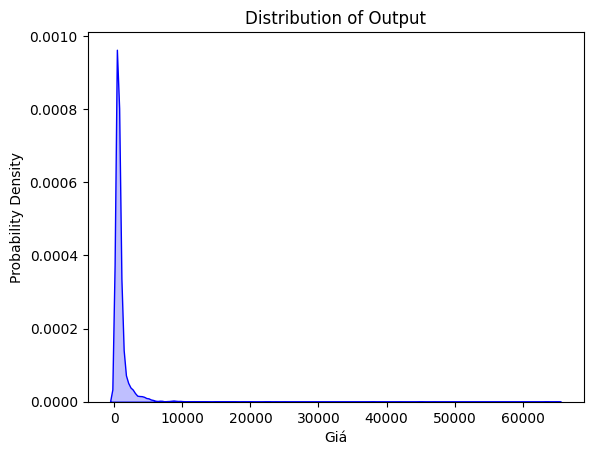

In [95]:
sns.kdeplot(data['Giá (triệu)'],color='b', shade=True)
plt.xlabel('Giá')
plt.ylabel('Probability Density')
plt.title('Distribution of Output')

### Distribution of continuous variables

<ipython-input-96-4ef5273de1aa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[con_vars[i]],color='b', shade=True,ax=axes[i])
<ipython-input-96-4ef5273de1aa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[con_vars[i]],color='b', shade=True,ax=axes[i])


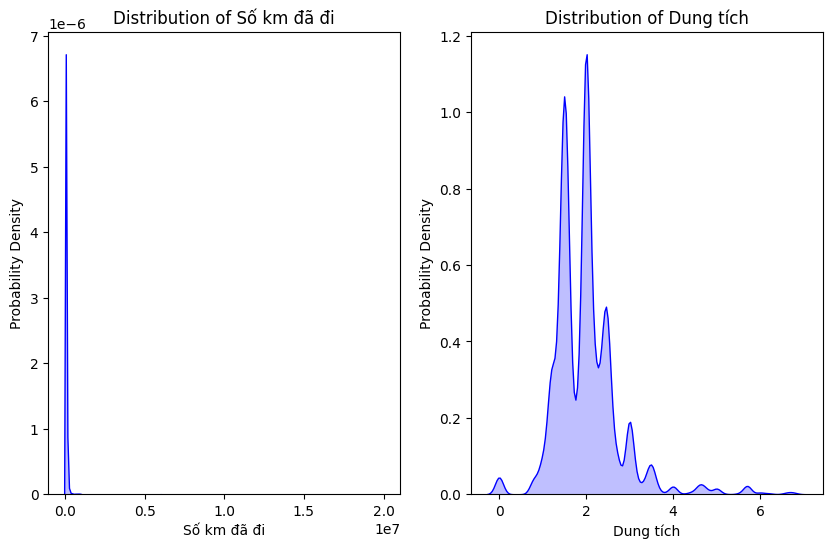

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
for i in range(len(con_vars)):
  sns.kdeplot(data[con_vars[i]],color='b', shade=True,ax=axes[i])
  axes[i].set_xlabel(con_vars[i])
  axes[i].set_ylabel('Probability Density')
  axes[i].set_title(f'Distribution of {con_vars[i]}')





<ipython-input-97-965bb6c29035>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Số chỗ'],kde=False)


<Axes: xlabel='Số chỗ'>

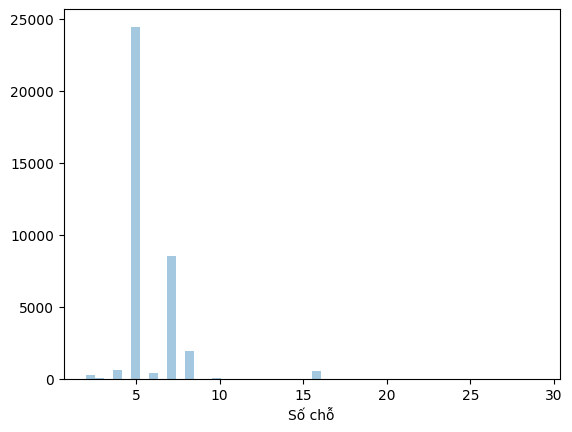

In [97]:
sns.distplot(data['Số chỗ'],kde=False)




### Count chart of some feature

[]

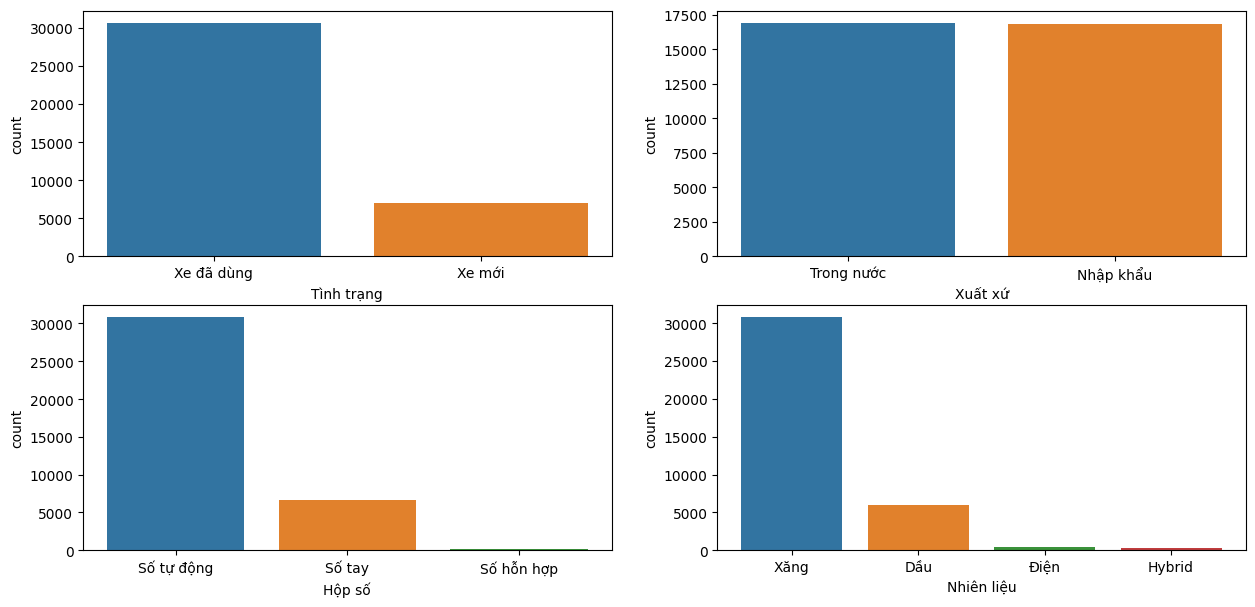

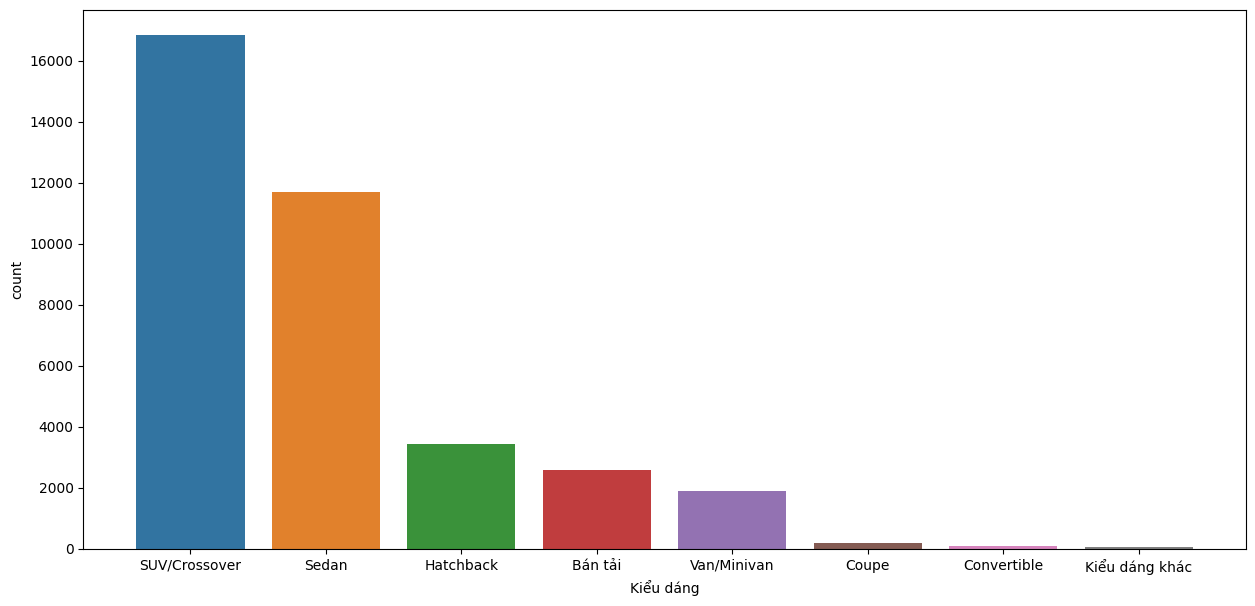

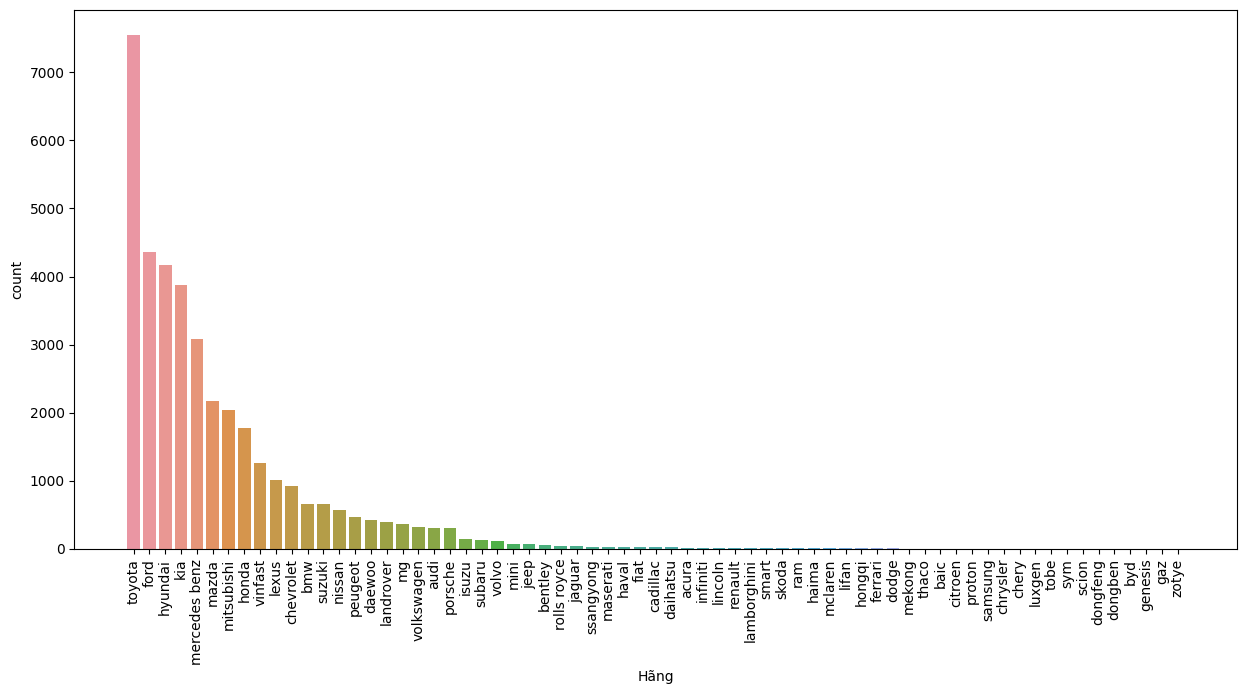

In [98]:
plt.figure(figsize=(15,7))
for i,col in enumerate(['Tình trạng', 'Xuất xứ','Hộp số', 'Nhiên liệu']):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()

plt.figure(figsize=(15,7))
sns.countplot(x=data['Kiểu dáng'], order=data['Kiểu dáng'].value_counts().index)
plt.plot()

plt.figure(figsize=(15,7))
sns.countplot(x=data['Hãng'], order=data['Hãng'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

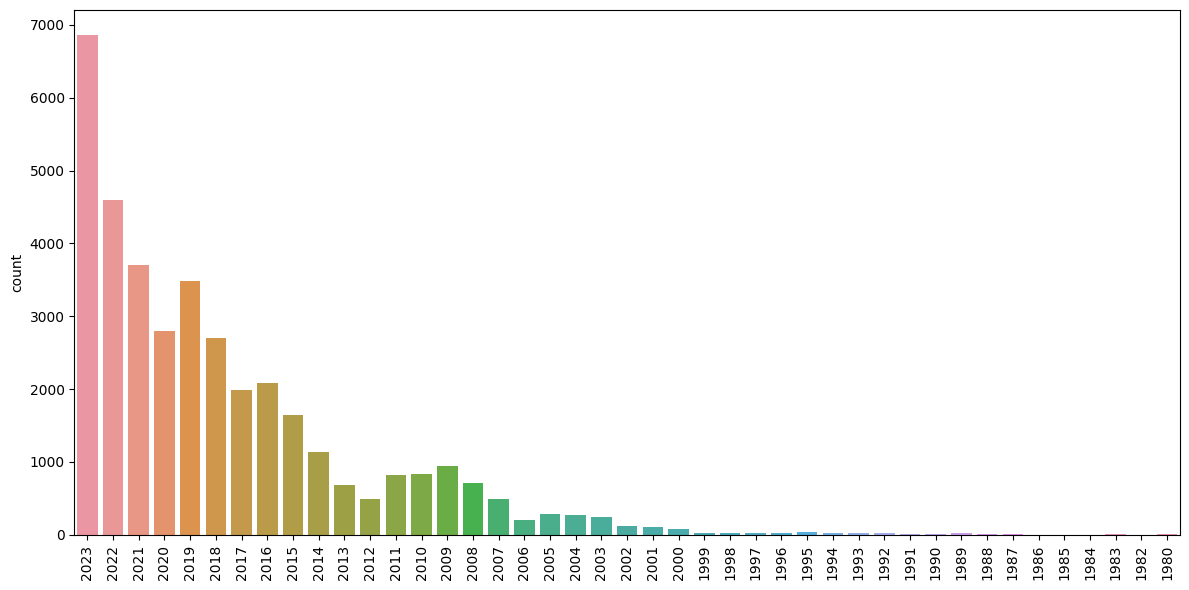

In [99]:
fig=plt.figure(figsize=(12,6))
sns.countplot(x=sorted(data['Năm sản xuất'],reverse=True))
plt.xticks(rotation=90)
fig.tight_layout()

tương tự continuous variables 1 số value trong các features Kiểu dáng,Hộp số,Nhiên liệu,Năm sản xuất có tần suất xuất hiện rất ít so với các value khác trong cùng feature,đây cũng có thể được xem là outlier trong trường hợp muốn xử lý hoặc giữ nguyên nếu nó vẫn cung cấp thông tin hữu ích

### Visualize phân phối về giá của từng giá trị trong mỗi feature

#### Phân phối giá xe theo Hãng

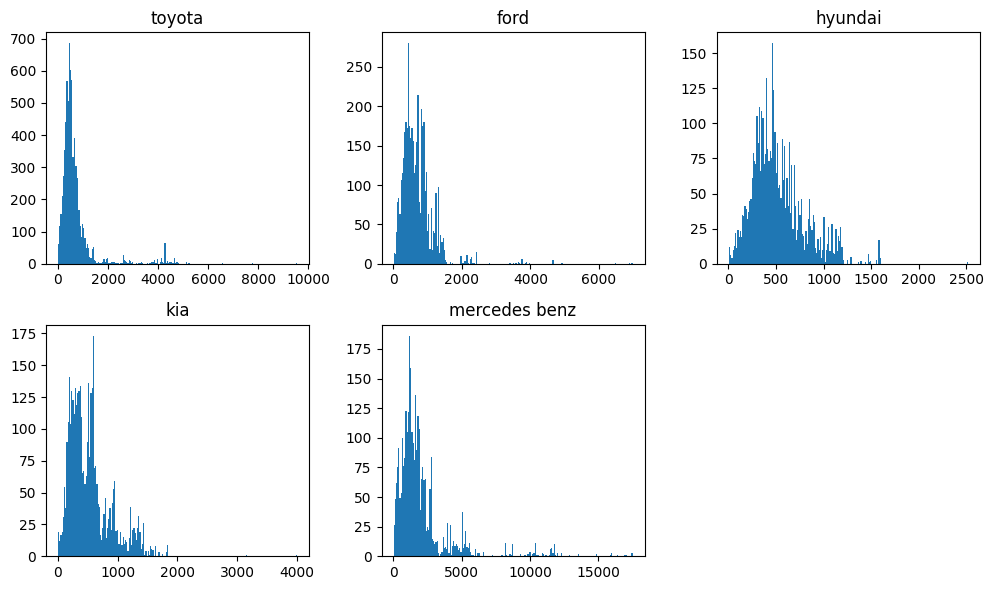

In [100]:
fig=plt.figure(figsize=(10,6))
for i,v in enumerate(['toyota','ford','hyundai','kia','mercedes benz']):
    plt.subplot(2,3,i+1)
    plt.hist(x=data['Giá (triệu)'][data['Hãng']==v],bins=200)
    plt.title(f'{v}')
    plt.plot()
fig.tight_layout()

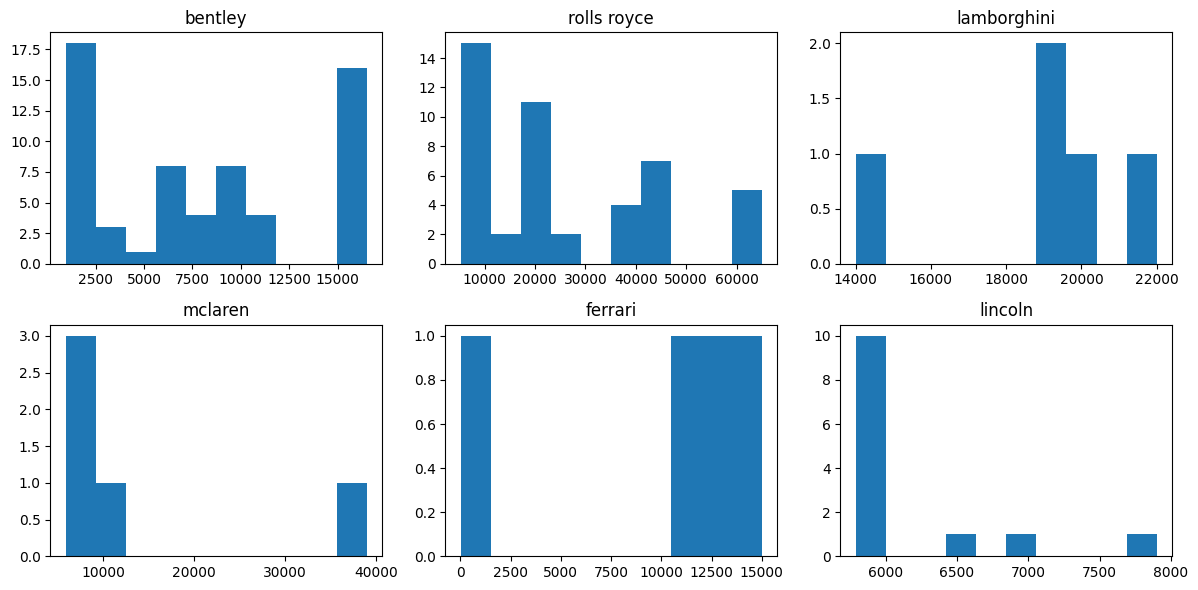

In [101]:
fig=plt.figure(figsize=(12,6))
for i,v in enumerate(['bentley','rolls royce','lamborghini','mclaren','ferrari','lincoln']):
    plt.subplot(2,3,i+1)
    plt.hist(x=data['Giá (triệu)'][data['Hãng']==v],bins=10)
    plt.title(f'{v}')
    plt.plot()
fig.tight_layout()

phân phối giá xe của 5 dòng xe trên tương đối lớn,nhiều xe là rất lớn so với mặt bằng chung của phân phối giá xe các dòng xe khác,hơn nữa số lượng xe của các Hãng này lại rất ít so với các hãng khác nên ta có thể gộp chung 5 hãng này thành hyper car để có thể tránh outliers.Tương tự những hãng còn lại trong các hãng có số lượng xe rất ít ta gộp chung về 1 giá trị mới là hãng khác.


Ngoài ra khi visualize các hyper car ở trên ta thấy có hãng Ferrari tồn tại 1 xe có giá rất thấp(gần 0) rõ ràng đây được xem là outlier của hãng này hay cũng được xem là outlier của toàn bộ data.Chúng ta sẽ xóa đi sample này

In [102]:
data[data['Hãng']=='ferrari']

,Hãng,Dòng xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Nhiên liệu,Dung tích,Số chỗ,Giá (triệu)
13033,ferrari,f8,2022,Xe đã dùng,0.0,Nhập khẩu,Convertible,Số tự động,Xăng,3.9,2.0,14999
15253,ferrari,portofino,2021,Xe đã dùng,6000.0,Nhập khẩu,Convertible,Số tự động,Xăng,3.9,4.0,11900
25749,ferrari,456,2001,Xe đã dùng,100000.0,Nhập khẩu,NaN,Số tay,Xăng,NaN,NaN,15
31285,ferrari,458,2015,Xe đã dùng,46000.0,Nhập khẩu,NaN,Số tự động,Xăng,NaN,NaN,13000


In [103]:
for i,v in enumerate(data['Hãng'].value_counts().index):
  num=data['Hãng'].value_counts()[i]
  print(f'{i} : {v} : {num}')

0 : toyota : 7543
1 : ford : 4358
2 : hyundai : 4172
3 : kia : 3871
4 : mercedes benz : 3080
5 : mazda : 2170
6 : mitsubishi : 2040
7 : honda : 1776
8 : vinfast : 1254
9 : lexus : 1008
10 : chevrolet : 918
11 : bmw : 660
12 : suzuki : 653
13 : nissan : 571
14 : peugeot : 460
15 : daewoo : 418
16 : landrover : 400
17 : mg : 365
18 : volkswagen : 319
19 : audi : 310
20 : porsche : 300
21 : isuzu : 144
22 : subaru : 123
23 : volvo : 109
24 : mini : 72
25 : jeep : 72
26 : bentley : 62
27 : rolls royce : 46
28 : jaguar : 35
29 : ssangyong : 29
30 : maserati : 28
31 : haval : 27
32 : fiat : 21
33 : cadillac : 20
34 : daihatsu : 18
35 : acura : 16
36 : infiniti : 15
37 : lincoln : 13
38 : renault : 6
39 : lamborghini : 5
40 : smart : 5
41 : skoda : 5
42 : ram : 5
43 : haima : 5
44 : mclaren : 5
45 : lifan : 5
46 : hongqi : 4
47 : ferrari : 4
48 : dodge : 4
49 : mekong : 3
50 : thaco : 3
51 : baic : 3
52 : citroen : 3
53 : proton : 2
54 : samsung : 2
55 : chrysler : 2
56 : chery : 2
57 : luxge

#### Phân phối giá của các giá trị trong feature Nhiên liệu

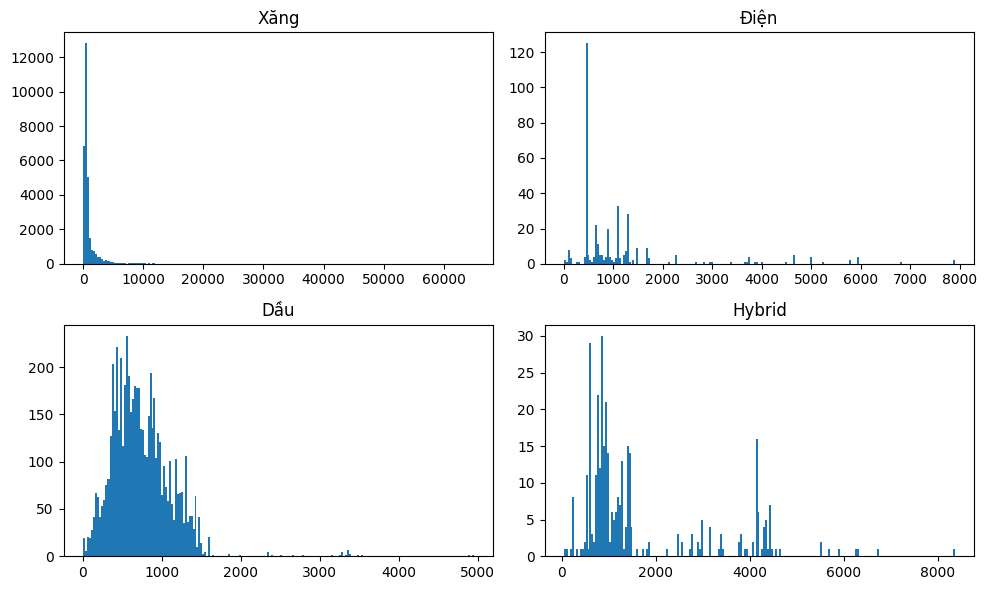

In [104]:
fig=plt.figure(figsize=(10,6))
for i,v in enumerate(np.delete(data['Nhiên liệu'].unique(),4)):
    plt.subplot(2,2,i+1)
    plt.hist(x=data['Giá (triệu)'][data['Nhiên liệu']==v],bins=200)
    plt.title(f'{v}')
    plt.plot()
fig.tight_layout()

Như đã nói ở trên chúng ta có thể xem Hybrid và Điện là các outlier values trong trường Nhiên liệu tuy nhiên khi visualize phân phối giá của các trường này ta thấy rằng số lượng các xe chạy bằng nhiên liệu hybrid có giá >=3000 chiếm 1 số lượng đáng kể so với các xe trong chạy bằng loại nhiên liệu này điều này tương đối khác so với phân phối giá của xe chạy bằng xăng và dầu khi lượng xe đắt hơn 3000 chiếm 1 phần rất nhỏ,không đáng kể so với chính phân phối của nó.Mặt khác với xe chạy bằng điện nếu chúng ta xem nó là outliers và quyết định xử lý(xóa,gộp,thay thế...) thì có thể gặp vấn đề khi suy diễn trong tương lai khi xu hưỡng xe điện ngày càng tăng.Vậy nên ta sẽ quyết định giữ lại cả 2 giá trị Hybrid và Điện mà không thực hiện bất kỳ quá trình xử lý gì.

#### phân phối giá của các giá trị trong feature hộp số

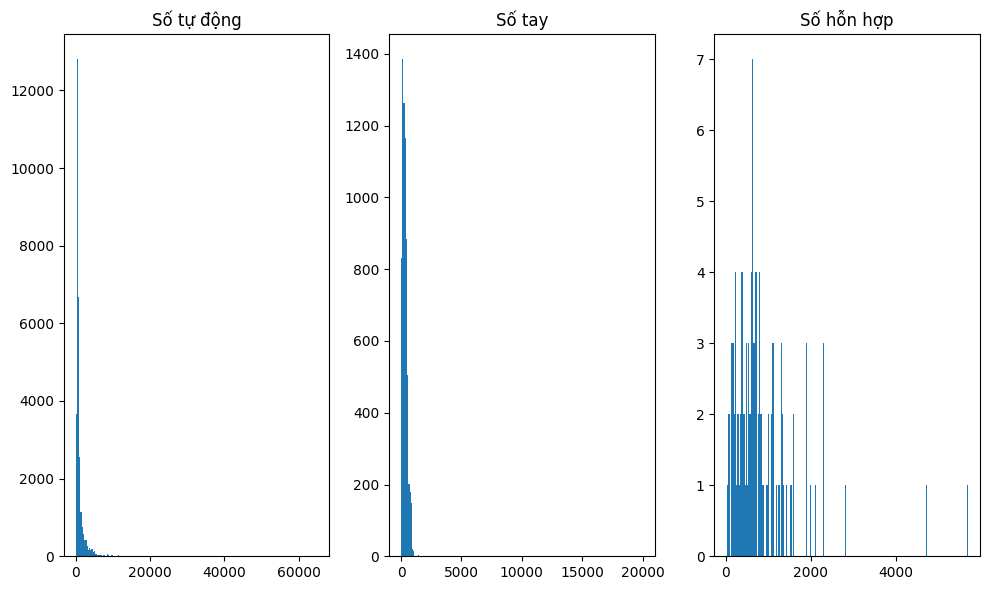

In [105]:
fig=plt.figure(figsize=(10,6))
for i,v in enumerate(np.delete(data['Hộp số'].unique(),3)):
    plt.subplot(1,3,i+1)
    plt.hist(x=data['Giá (triệu)'][data['Hộp số']==v],bins=200)
    plt.title(f'{v}')
    plt.plot()
fig.tight_layout()

Ta thấy phân phối giá của các xe chạy bằng hộp số hỗn hợp là tương đối giống so với loại xe chạy bằng số tay,hơn nữa số lượng xe chạy số hỗn hợp là rất nhỏ so với 2 loại còn lại (đặc biệt là rất nhỏ khi so với số tự động) nên chúng ta có thể gộp xe có hộp số hỗn hợp vào chung với hộp số tay thành tên gọi là "Khác"

#### phân phối giá của các giá trị trong feature Kiểu dáng

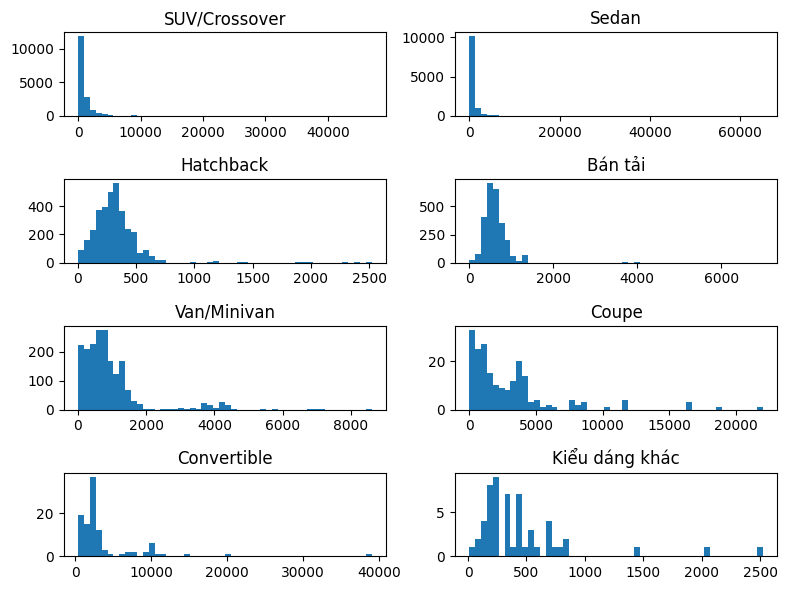

In [106]:
fig=plt.figure(figsize=(8,6))
for i,v in enumerate(np.delete(data['Kiểu dáng'].unique(),8)):
    plt.subplot(4,2,i+1)
    plt.hist(x=data['Giá (triệu)'][data['Kiểu dáng']==v],bins=50)
    plt.title(f'{v}')
    plt.plot()
fig.tight_layout()

Có thể thấy được phân phối giá của 3 giá trị có tuần suất xuất hiện thấp hơn các kiểu xe khác là Coupe,Convertible và Kiểu dáng khác tương đối khác so với các kiểu dáng xe còn lại.Cụ thể những dòng xe này thường có giá cao hơn những dòng xe còn lại nên đây cũng được xem là 1 thông tin quan trọng mà mô hình có thể học được để đưa ra dự đoán chính xác hơn

#### Phân phối giá của các xe theo từng năm sản xuất

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

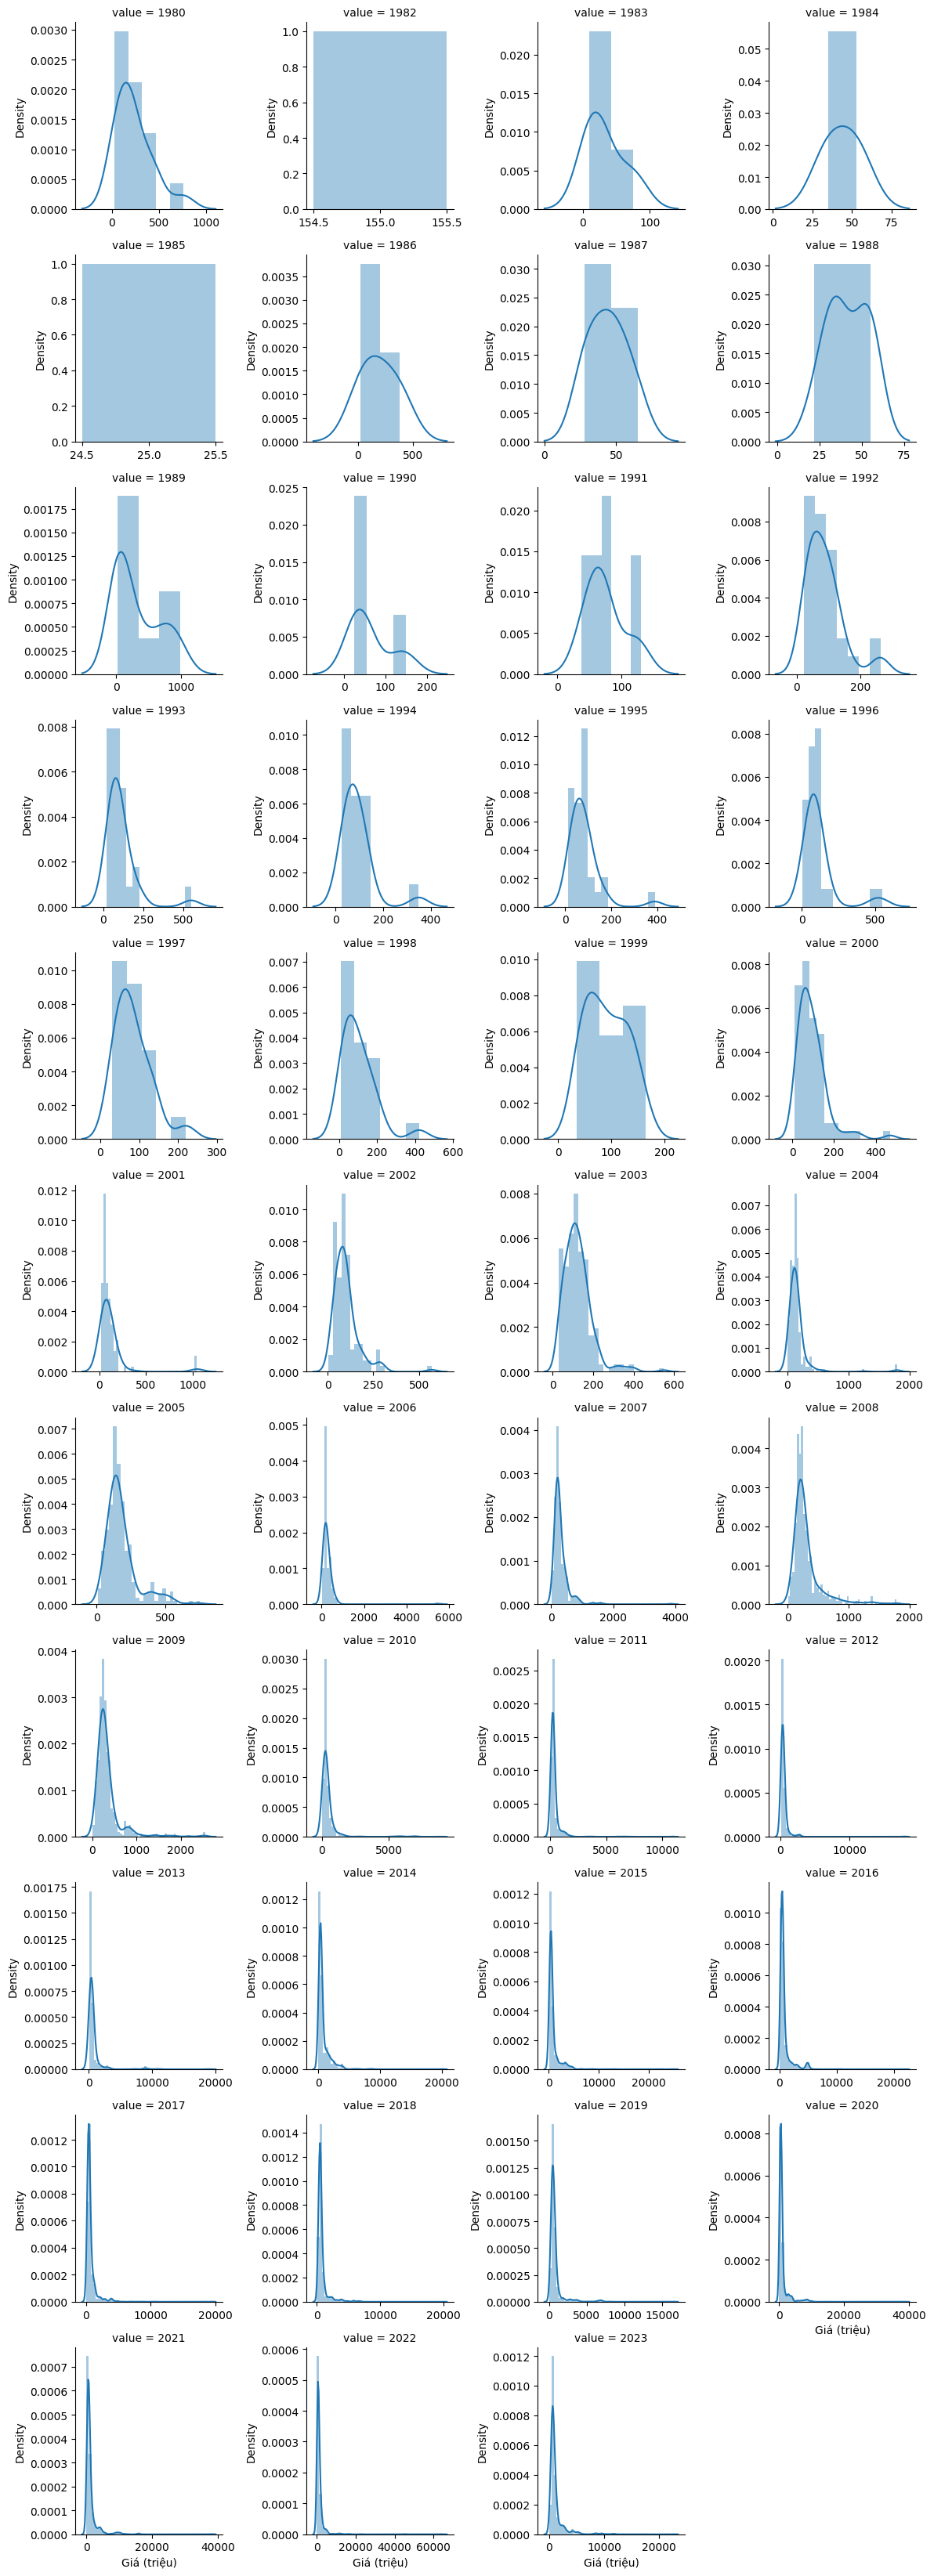

In [107]:
data1=data.sort_values(by='Năm sản xuất',axis=0)
f3=pd.melt(data1,id_vars='Giá (triệu)',value_vars='Năm sản xuất')
graph=sns.FacetGrid(f3,col='value',col_wrap=4,sharex=False,sharey=False)
graph.map(sns.distplot,'Giá (triệu)')

Có thể thấy phân phối giá của những năm gần nhau thì tương đối giống nhau,từ đây chúng ta có thể binning các năm gần nhau về cùng 1 bin để xử lý outliers cho những năm có tần số xuất hiện thấp

### Boxplot

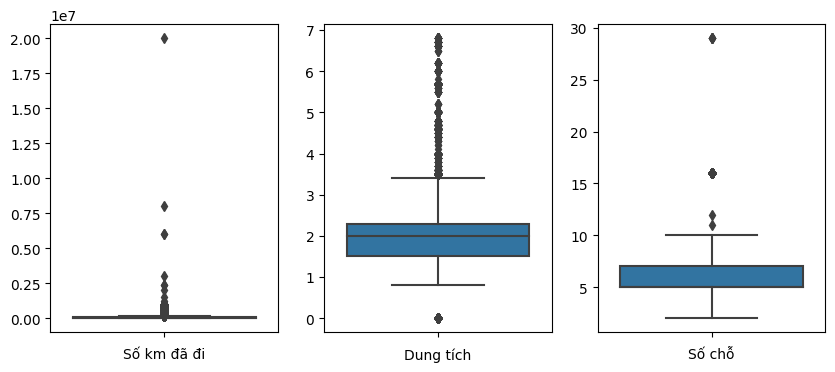

In [108]:
fig, axes = plt.subplots(1,3, figsize=(10, 4))
for i,cols in enumerate(num_vars):
    sns.boxplot(y=cols,data=data,ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('')
plt.show()



*   hầu hết số km đã đi bằng 0 tức là xe mới
*   Số lượng xe có dung tích >= 3 lít khá ít đặc biệt số xe có dung tích >=6 rất ít đây có thể xem là những outliers

*   Tương tự,hầu hết các xe có số chỗ <10,một số ít còn lại có số chỗ tương đối lớn cũng có thể được xem là outliers
->Những giá trị outliers này có thể được xử lý để tránh tác động xấu lên mô hình trong quá trình học nhưng cũng có thể được giữ lại nếu nó thực sự mang đến 1 số thông tin hữu ích





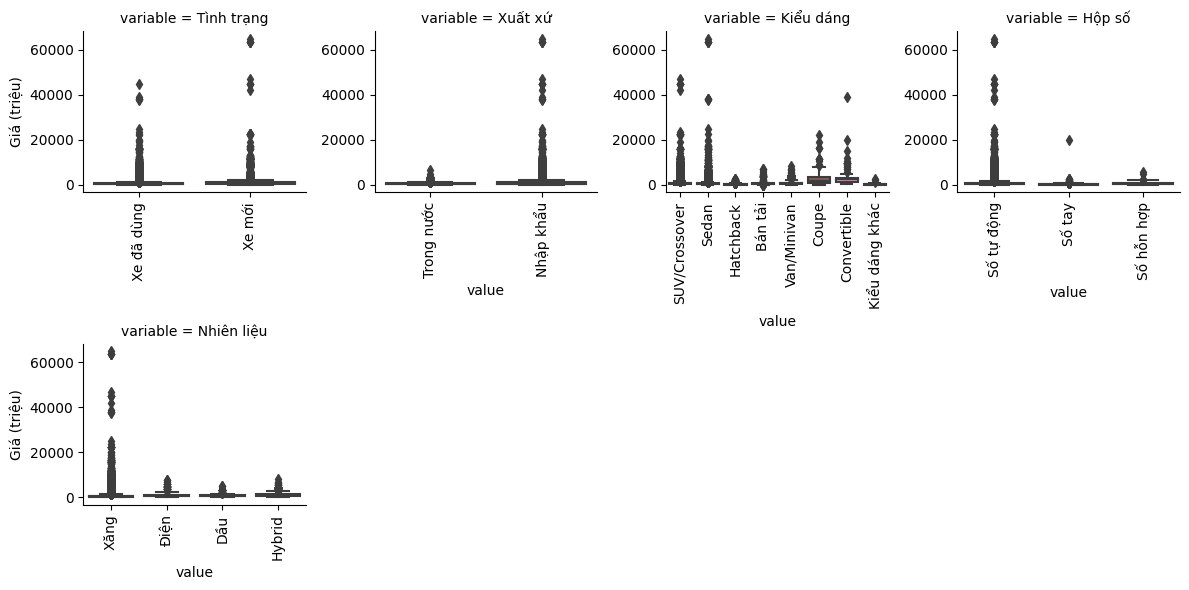

In [109]:
c_vars=[i for i in cat_vars if i not in ['Hãng','Năm sản xuất','Dòng xe']]
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f2=pd.melt(data,id_vars='Giá (triệu)',value_vars=c_vars)
graph=sns.FacetGrid(f2,col='variable',col_wrap=4,sharex=False,sharey=False)
graph.map(boxplot,'value','Giá (triệu)')

### Heatmap correlation

<ipython-input-110-9ad8a5f3dbe4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(data[num_vars+ord_var].corr(method='pearson')),vmin=0,vmax=1,square=True,cmap=cmap,annot=True)


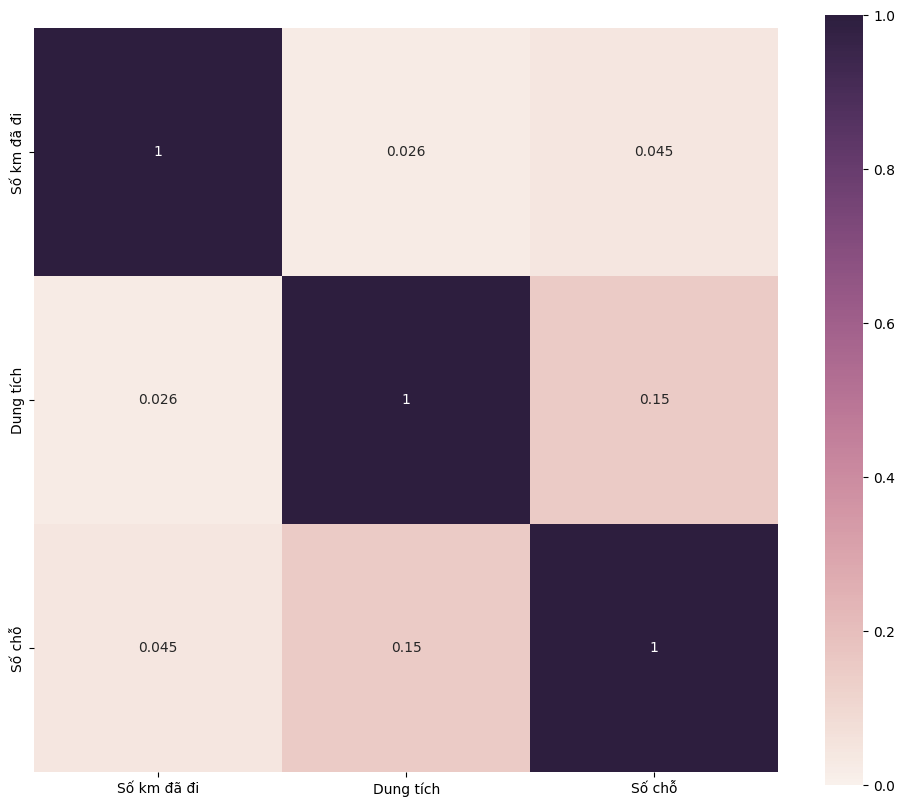

In [110]:
plt.figure(figsize=(12,10))
cmap=sns.cubehelix_palette(light=0.95,as_cmap=True)
sns.heatmap(abs(data[num_vars+ord_var].corr(method='pearson')),vmin=0,vmax=1,square=True,cmap=cmap,annot=True)
plt.show()

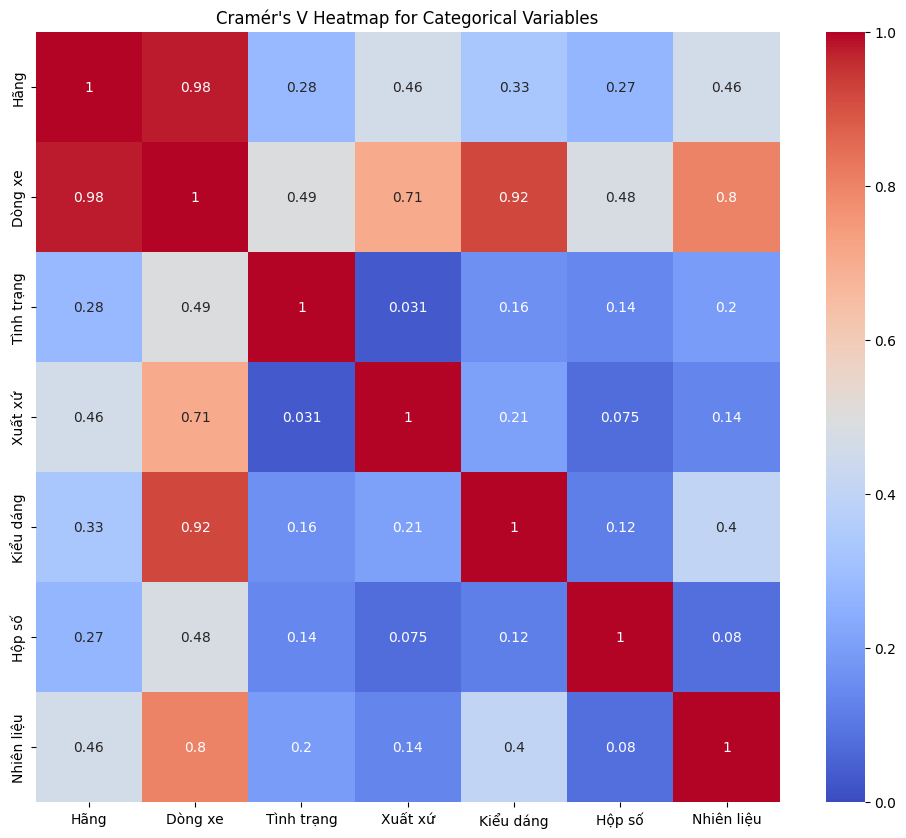

In [111]:

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_matrix = pd.DataFrame(index=nom_vars, columns=nom_vars)

for var1 in nom_vars:
    for var2 in nom_vars:
        confusion_matrix = pd.crosstab(data[var1], data[var2])
        cramers_matrix.loc[var1, var2] = cramers_v(confusion_matrix)


plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title('Cramér\'s V Heatmap for Categorical Variables')
plt.show()


Có thể thấy,trường dữ liệu dòng xe có tương quan tương đối lớn > 0.7 so với các trường nhiên liệu,kiểu dáng,xuất xứ và hãng.Đặc biệt tương quan của nhiên liệu với 2 trường kiểu dáng và hãng rất cao lần lượt là 0.92 và 0.98.Do đó chúng ta có thể lựa chọn bỏ đi feature này để tránh hiện tượng multi-colinear (đa cộng tuyến) dẫn đến sự diễn giải khó cho mô hình

# Data Preparation

## Remove redundancy feature

In [112]:
# featue :Tình trạng hoàn toàn là dư thừa khi feature: Số km đã đi đã hoàn toàn thể hiện được 100% thông tin từ feature Tình trạng.
data.drop('Tình trạng',axis=1,inplace=True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37583 entries, 0 to 37582
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hãng          37583 non-null  object 
 1   Dòng xe       37583 non-null  object 
 2   Năm sản xuất  37583 non-null  object 
 3   Số km đã đi   37331 non-null  float64
 4   Xuất xứ       33736 non-null  object 
 5   Kiểu dáng     36799 non-null  object 
 6   Hộp số        37582 non-null  object 
 7   Nhiên liệu    37581 non-null  object 
 8   Dung tích     37027 non-null  float64
 9   Số chỗ        36704 non-null  float64
 10  Giá (triệu)   37583 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.2+ MB


## Handle outliers

### Handle categorical outliers

In [114]:
#xóa outlier của hãng ferrari
data.drop([25749],axis=0,inplace=True)

In [115]:
#chuyển số hỗn hợp+số tay về chung 1 label 'Khác'
data['Hộp số'][data['Hộp số']=='Số hỗn hợp']='Số tay'
data['Hộp số'][data['Hộp số']=='Số tay']='Khác'


<ipython-input-115-9b1c21be312d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hộp số'][data['Hộp số']=='Số hỗn hợp']='Số tay'
<ipython-input-115-9b1c21be312d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hộp số'][data['Hộp số']=='Số tay']='Khác'


In [116]:
#Binning Năm sản xuất
df=pd.DataFrame()
def bin_year(x):
  if 1980<=int(x)<=2000 :
    x='1980-2000'
  elif 2001 <=int(x)<=2005:
    x='2001-2005'
  elif 2006 <=int(x)<=2010 :
    x='2006-2010'
  return x
df['Năm sản xuất']=data['Năm sản xuất'].apply(bin_year)

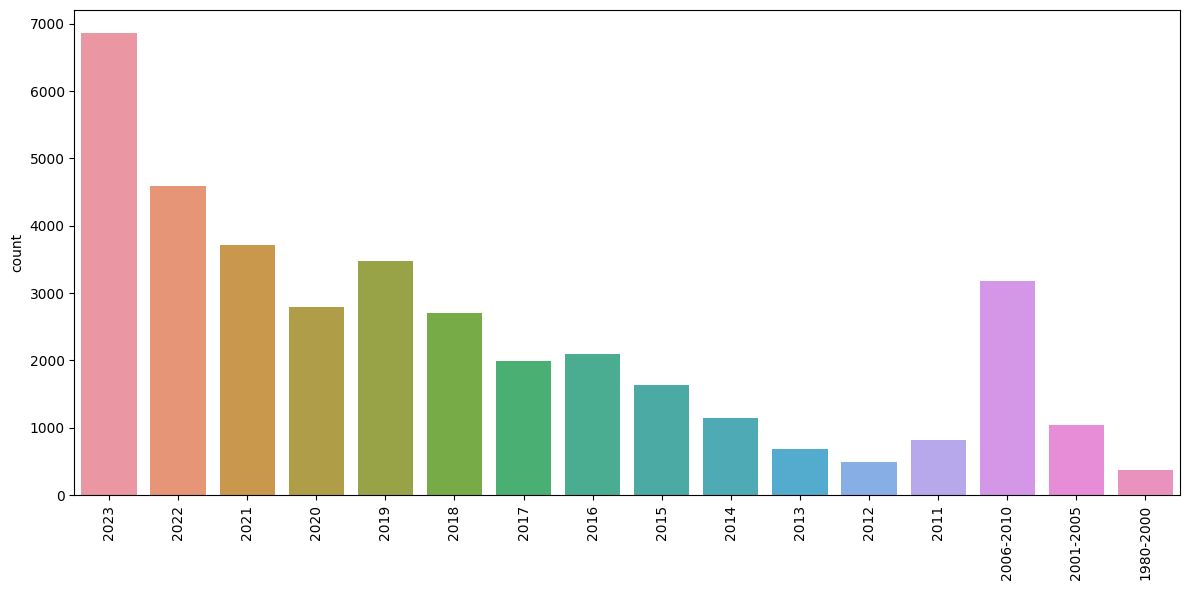

In [117]:
#countplot của Năm sản xuất sau khi đã binning
fig=plt.figure(figsize=(12,6))
sns.countplot(x=sorted(df['Năm sản xuất'],reverse=True))
plt.xticks(rotation=90)
fig.tight_layout()

In [118]:
# gộp các hãng xe có số lượng xe ít lại với nhau
for v in (data['Hãng'].value_counts().index[26::]):
  if v not in ['bentley','rolls royce','lamborghini','mclaren','ferrari','lincoln']:
    data['Hãng'].replace({v:'hãng khác'},inplace=True)
for c in ['bentley','rolls royce','lamborghini','mclaren','ferrari','lincoln']:
  data['Hãng'].replace({c:'hyper car'},inplace=True)


[]

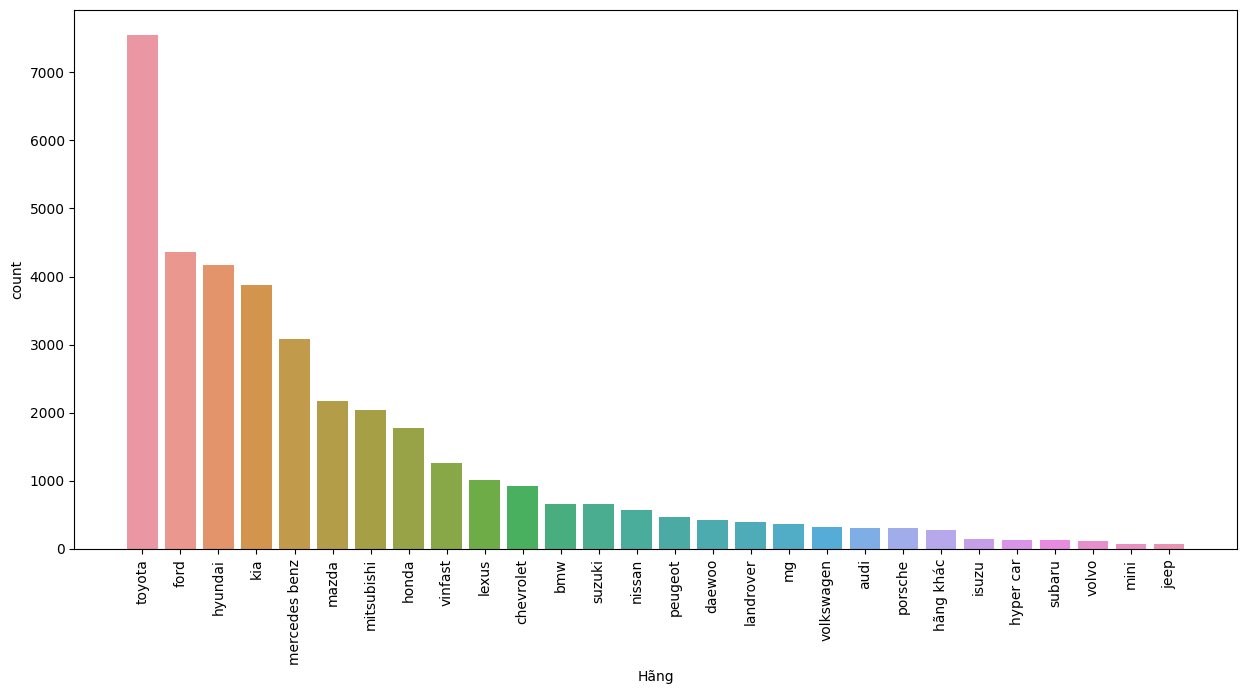

In [119]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['Hãng'], order=data['Hãng'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

### Handle numerical outliers

từ biểu đồ boxplot của feature:Số chỗ,ta thấy có 1 số lượng ít các xe có số chỗ >20,chúng ta có thể xem đây là các outlies cần xử lý.Điều đặc biệt là các xe này đều có chung kiểu dáng Van/Minivan nhưng rõ ràng trong thực tế kiểu dáng này chỉ dùng cho các dòng xe hạng trung có kích thước từ 9-16 chỗ ngồi nên khả năng là label kiểu dáng của các dòng xe này đã bị gán sai,hơn nữa ta biết được các xe có trên 20 chỗ ngồi thường được gọi là xe chở khách do đó chúng ta sẽ replace label kiểu dáng của các xe này -> chở khách

In [120]:
data[data['Số chỗ']>16]

,Hãng,Dòng xe,Năm sản xuất,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Nhiên liệu,Dung tích,Số chỗ,Giá (triệu)
3158,hyundai,county,2009,300000.0,Trong nước,Van/Minivan,Khác,Dầu,3.9,29.0,275
22098,hyundai,county,2007,1234.0,Trong nước,Van/Minivan,Khác,Dầu,3.9,29.0,145
24751,hyundai,county,2014,385000.0,Nhập khẩu,Van/Minivan,Khác,Dầu,3.9,29.0,650
32362,hyundai,county,2012,260.0,Trong nước,Van/Minivan,Khác,Dầu,3.9,29.0,539
36901,hyundai,county,2023,0.0,Trong nước,Van/Minivan,Khác,Dầu,3.9,29.0,1470


In [121]:
data['Kiểu dáng'][data['Số chỗ'] >= 16]='Chở khách'

<ipython-input-121-b8db115b3f73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kiểu dáng'][data['Số chỗ'] >= 16]='Chở khách'


In [122]:
#Từ đây trở đi các transformer chúng ta sử dụng cần phải tính và áp dụng statistical argument của tập dữ liệu nên phải split dữ liệu ra
from sklearn.model_selection import train_test_split
y=data['Giá (triệu)']
X=data.drop('Giá (triệu)',axis=1)
X_train,X_val_test,y_train,y_val_test=train_test_split(X,y,test_size=0.4,random_state=42)
#X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=42)

In [123]:
from typing import Tuple,List
from sklearn.base import BaseEstimator, TransformerMixin
def find_boxplot_boundaries(
    col: pd.DataFrame, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas dataframe of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25).to_numpy()
    Q3 = col.quantile(0.75).to_numpy()
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [124]:
#xử lý outlier với continuous variable
boc=BoxplotOutlierClipper()
X_train[con_vars]=boc.fit_transform(X_train[con_vars])
X_val_test[con_vars]=boc.transform(X_val_test[con_vars])

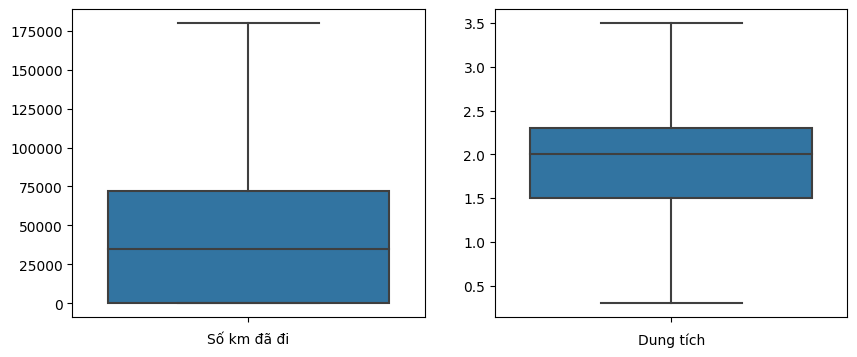

In [125]:
#biểu đồ boxplot của continuous variables sau khi xử lý outliers
fig, axes = plt.subplots(1,2, figsize=(10, 4))
for i,cols in enumerate(con_vars):
    sns.boxplot(y=cols,data=X_train,ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('')
plt.show()

## Handle missing values

Những trường chỉ có 1,2 giá trị Null value như Hộp số hay Nhiên liệu chúng ta sẽ drop các hàng chứ Null,các giá trị Null trong các trường còn lại chúng ta sẽ imputor.

In [126]:
#drop các hàng chứa giá trị Null trong các trường Hộp số và Nhiên liệu
X_train=X_train.dropna(subset=['Nhiên liệu','Hộp số'])
X_val_test=X_val_test.dropna(subset=['Nhiên liệu','Hộp số'])
y_train.drop([18215],axis=0,inplace=True)
y_val_test.drop([34680],axis=0,inplace=True)


In [127]:
#Fill missing values của feature Số km đã đi
#Số km đã đi fill = mean thep groupby năm sản xuất
X_train['Số km đã đi']=X_train.groupby('Năm sản xuất')['Số km đã đi'].transform(lambda x:x.fillna(x.mean()))
X_val_test['Số km đã đi']=X_val_test.groupby('Năm sản xuất')['Số km đã đi'].transform(lambda x:x.fillna(x.mean()))

In [128]:
#các trường xuất xứ,kiểu dáng,dung tích,số chỗ fill = mode theo groupby 'Dòng xe' và 'Hãng'
vars=['Xuất xứ','Kiểu dáng','Dung tích','Số chỗ']
X_train[vars]=X_train.groupby(['Dòng xe','Hãng'])[vars].transform(lambda x:x.fillna(x.mode().iloc[0]))
X_val_test[vars]=X_val_test.groupby(['Dòng xe','Hãng'])[vars].transform(lambda x:x.fillna(x.mode().iloc[0]))


In [129]:
X_train.isnull().sum()


Hãng              0
Dòng xe           0
Năm sản xuất      0
Số km đã đi       0
Xuất xứ           0
Kiểu dáng       174
Hộp số            0
Nhiên liệu        0
Dung tích       192
Số chỗ          241
dtype: int64

In [130]:
X_val_test.isnull().sum()

Hãng              0
Dòng xe           0
Năm sản xuất      0
Số km đã đi       0
Xuất xứ           1
Kiểu dáng       124
Hộp số            0
Nhiên liệu        0
Dung tích       119
Số chỗ          181
dtype: int64

Sở dĩ sau khi fill xong vẫn còn 1 ít Null là vì sau khi groupby 1 số feature thì mode lại chính là Null.Đối với 1 số ít Null còn lại ta sẽ fill bằng chính mode của mỗi trường dữ liệu mà k groupby nữa

In [131]:
X_train[vars]=X_train[vars].transform(lambda x:x.fillna(x.mode().iloc[0]))
X_val_test[vars]=X_val_test[vars].transform(lambda x:x.fillna(x.mode().iloc[0]))

Đến đây sau khi đã sử dụng column Năm sản xuất (gốc) để fill missing value chúng ta sẽ binning Năm sản xuất như đã nói ở trước đó,đồng thời xóa column Dòng xe với lí do đã nói ở trên

In [132]:
X_train.drop(['Năm sản xuất','Dòng xe'],axis=1,inplace=True)
X_val_test.drop(['Năm sản xuất','Dòng xe'],axis=1,inplace=True)
X_train=pd.concat([X_train,df], axis=1, join='inner')
X_val_test=pd.concat([X_val_test,df], axis=1, join='inner')

In [133]:
cat_vars  = [i for i in cat_vars if i not in ['Tình trạng','Dòng xe']]
nom_vars = [i for i in nom_vars if i not in ['Tình trạng','Dòng xe']]

In [134]:
X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=42)

## Encode categorical variables

In [135]:
encoder= ColumnTransformer(transformers=[('ordinal encoding',JamesSteinEncoder(),[8]),
                                         ('nominal encoding',OneHotEncoder(sparse_output= False),[0,2,3,4,5])],remainder = 'passthrough')


## Scaling data

In [136]:
normalization=ColumnTransformer(transformers=[('normalization',StandardScaler(),[1,6,7,8])],remainder = 'passthrough')

# Modeling

## Random Forest

In [137]:
model_rf=RandomForestRegressor()

In [138]:
pipeline_rf=Pipeline([('step1',encoder),('step2',normalization),('step3',model_rf)])

In [139]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3', RandomForestRegressor())])

In [140]:
mean_absolute_percentage_error(y_val,pipeline_rf.predict(X_val))

0.3428545249513051

In [141]:
para_grid_rf_tune={'step3__n_estimators':[50,100,200,500],
                   'step3__max_depth':[None,2,4,6],
                   'step3__max_features':[1,'sqrt','log2'],
                   'step3__max_leaf_nodes':[None,2,4,6]}

In [142]:
grid_search = GridSearchCV(pipeline_rf,para_grid_rf_tune, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal '
                                                                         'encoding',
                                                                         JamesSteinEncoder(),
                                                                         [8]),
                                                                        ('nominal '
                                                                         'encoding',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         [0, 2,
                                                                          3, 4,
                                                                          5])])),
                                       ('step2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('normalization',
                                                                         StandardScaler(),
                                                                         [1, 6,
                                                                          7,
                                                                          8])])),
                                       ('step3', RandomForestRegressor())]),
             param_grid={'step3__max_depth': [None, 2, 4, 6],
                         'step3__max_features': [1, 'sqrt', 'log2'],
                         'step3__max_leaf_nodes': [None, 2, 4, 6],
                         'step3__n_estimators': [50, 100, 200, 500]},
             scoring='neg_mean_absolute_percentage_error')

In [143]:
best_params_rf = grid_search.best_params_
best_model_rf = grid_search.best_estimator_
print(f'best hyper parameters set is : {best_params_rf}')
print(f'best model of random forest is : {best_model_rf}')

best hyper parameters set is : {'step3__max_depth': None, 'step3__max_features': 'sqrt', 'step3__max_leaf_nodes': None, 'step3__n_estimators': 100}
best model of random forest is : Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3', RandomForestRegressor(max_features='sqrt'))]

In [144]:
val_pred_rf=best_model_rf.predict(X_val)
mape_rf=mean_absolute_percentage_error(y_val,val_pred_rf)


In [145]:
mape_rf

0.3465440198325924

## KNN

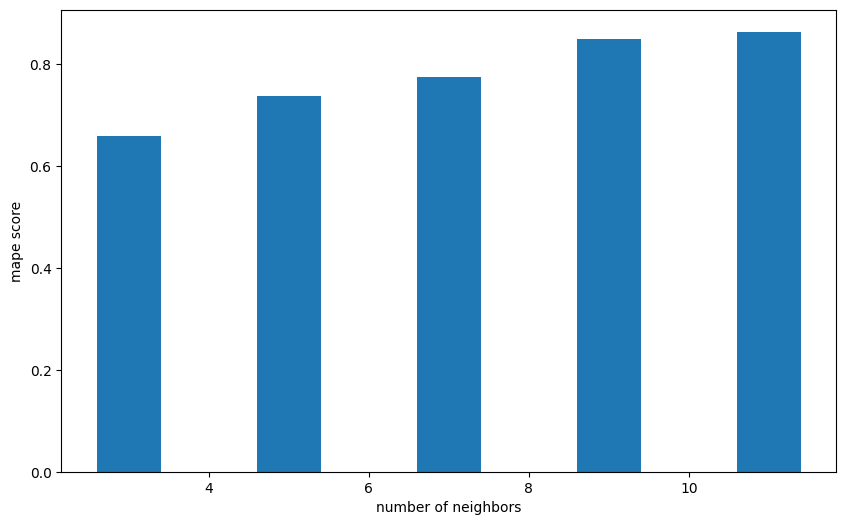

In [146]:
n_neighbor=[3,5,7,9,11]
mape_scores=[]
neighbors=[]

for neighbor in n_neighbor:
    model_knn=KNeighborsRegressor(n_neighbors=neighbor)
    pipeline_knn=Pipeline([('step1',encoder),('step2',normalization),('step3',model_knn)])

    pipeline_knn.fit(X_train, y_train)
    test_pred_knn = pipeline_knn.predict(X_test)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_test,test_pred_knn))
plt.figure(figsize=(10,6))
plt.bar(n_neighbor,mape_scores)
plt.xlabel('number of neighbors')
plt.ylabel('mape score')
plt.show()



có thể thấy với số neighbor càng nhỏ thì MAPE cũng càng nhỏ (càng tốt) tuy nhiên để tránh overfitting,chúng ta sẽ chọn neighbor=5

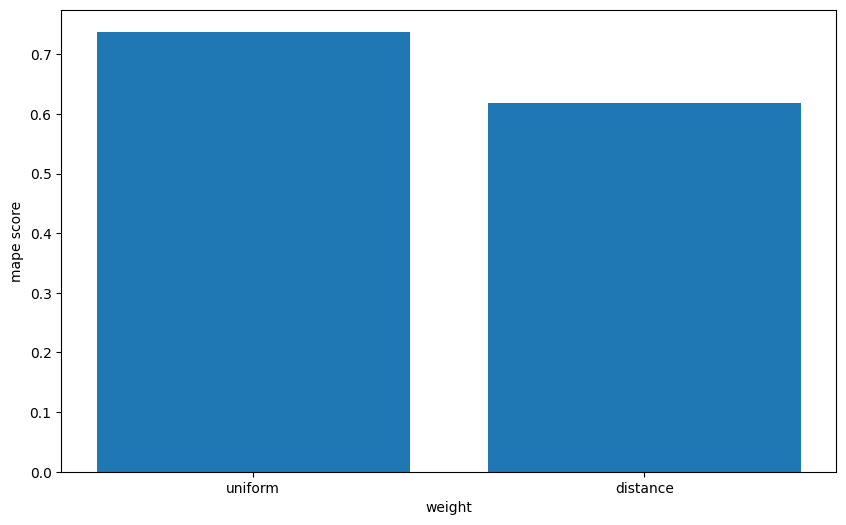

In [147]:
weight=['uniform','distance']
mape_scores=[]


for w in weight:
    model_knn=KNeighborsRegressor(n_neighbors=5,weights=w)
    pipeline_knn=Pipeline([('step1',encoder),('step2',normalization),('step3',model_knn)])

    pipeline_knn.fit(X_train, y_train)
    test_pred_knn = pipeline_knn.predict(X_test)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_test,test_pred_knn))
plt.figure(figsize=(10,6))
plt.bar(weight,mape_scores)
plt.xlabel('weight')
plt.ylabel('mape score')
plt.show()

dễ thấy weights tối ưu ở đây được chọn sẽ là distance

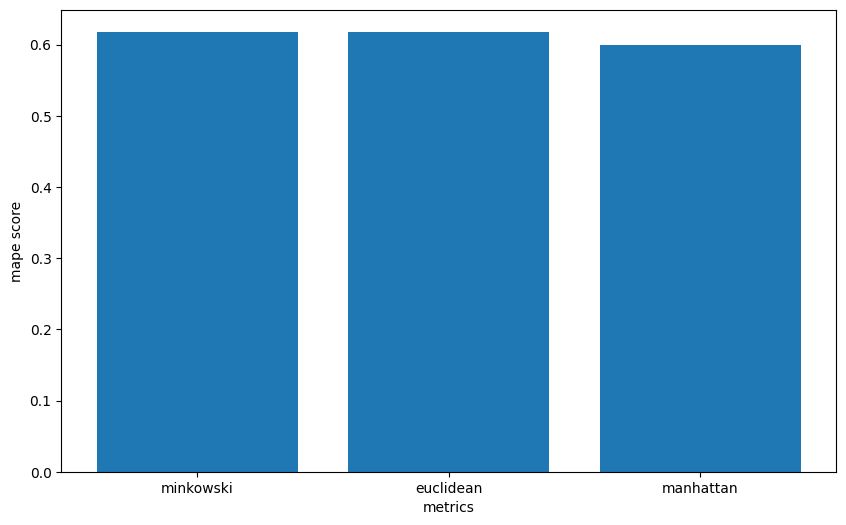

In [148]:
metrics=['minkowski','euclidean','manhattan']
mape_scores=[]


for m in metrics:
    model_knn=KNeighborsRegressor(n_neighbors=5,weights='distance',metric=m)
    pipeline_knn=Pipeline([('step1',encoder),('step2',normalization),('step3',model_knn)])

    pipeline_knn.fit(X_train, y_train)
    test_pred_knn = pipeline_knn.predict(X_test)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_test,test_pred_knn))
plt.figure(figsize=(10,6))
plt.bar(metrics,mape_scores)
plt.xlabel('metrics')
plt.ylabel('mape score')
plt.show()

In [149]:
best_model_knn=KNeighborsRegressor(n_neighbors=5,weights='distance',metric='minkowski')
pipeline_knn=Pipeline([('step1',encoder),('step2',normalization),('step3',best_model_knn)])
pipeline_knn.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3', KNeighborsRegressor(weights='distance'))])

In [150]:
test_pred_knn=pipeline_knn.predict(X_test)
mape_knn=mean_absolute_percentage_error(y_test,test_pred_knn)

## XGBoost

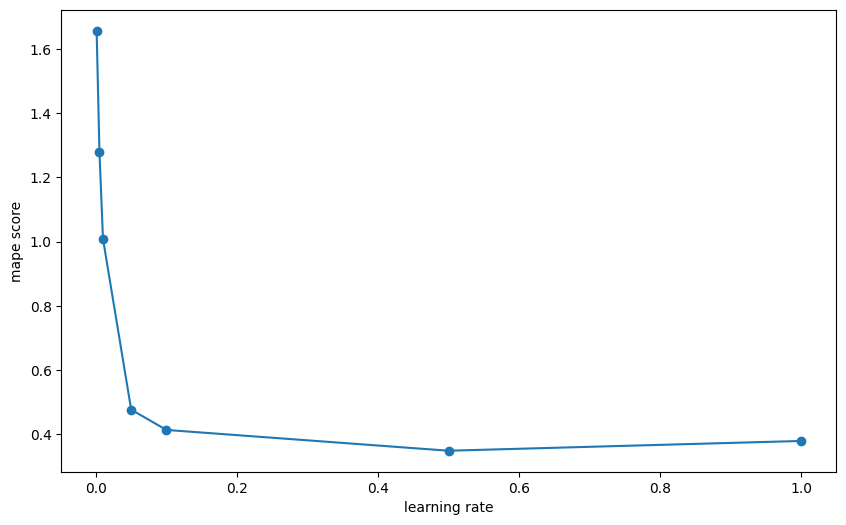

In [151]:
lr=[0.001,0.005,0.01,0.05,0.1,0.5,1]
mape_scores=[]


for i in lr:
    model_xgb=XGBRegressor(learning_rate=i)
    pipeline_xgb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_xgb)])

    pipeline_xgb.fit(X_train, y_train)
    val_pred_xgb = pipeline_xgb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_xgb))
plt.figure(figsize=(10,6))
plt.plot(lr,mape_scores,marker='o')
plt.xlabel('learning rate')
plt.ylabel('mape score')
plt.show()

dễ thấy ta sẽ chọn với lr=0.5 để có mape tốt nhất trên tập validiation

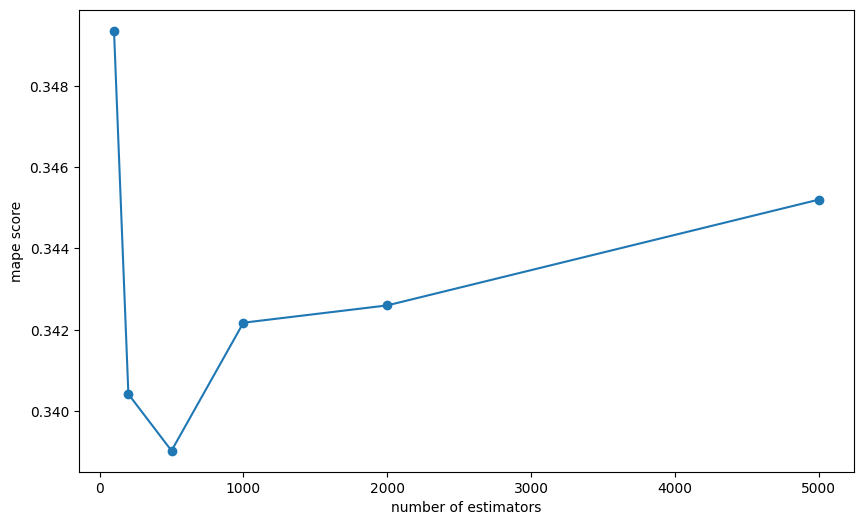

In [152]:
n_estimator=[100,200,500,1000,2000,5000]
mape_scores=[]


for tree in n_estimator:
    model_xgb=XGBRegressor(learning_rate=0.5,n_estimators=tree)
    pipeline_xgb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_xgb)])

    pipeline_xgb.fit(X_train, y_train)
    val_pred_xgb = pipeline_xgb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_xgb))
plt.figure(figsize=(10,6))
plt.plot(n_estimator,mape_scores,marker='o')
plt.xlabel('number of estimators')
plt.ylabel('mape score')
plt.show()

với n_estimators=500 thì performance của model sẽ tốt nhất cùng hyper parameter cố định là lr=0.5

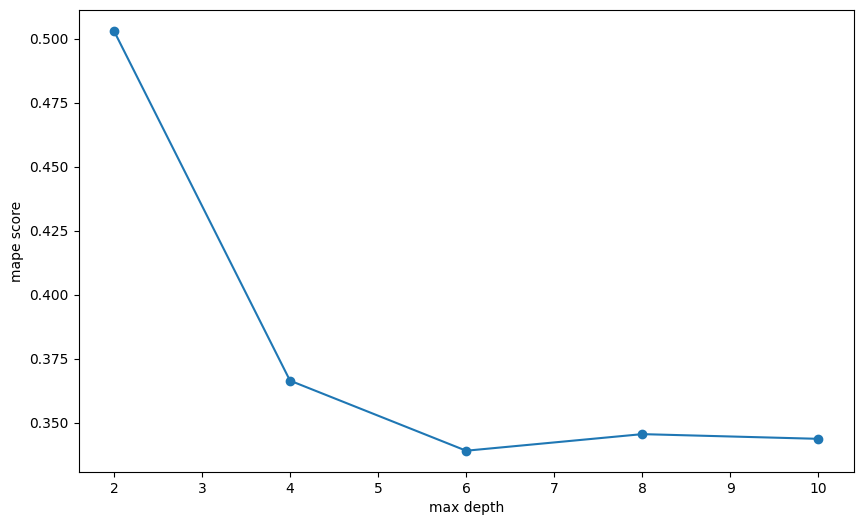

In [153]:
max_depth=[2,4,6,8,10]
mape_scores=[]


for depth in max_depth:
    model_xgb=XGBRegressor(learning_rate=0.5,n_estimators=500,max_depth=depth)
    pipeline_xgb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_xgb)])

    pipeline_xgb.fit(X_train, y_train)
    val_pred_xgb = pipeline_xgb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_xgb))
plt.figure(figsize=(10,6))
plt.plot(max_depth,mape_scores,marker='o')
plt.xlabel('max depth')
plt.ylabel('mape score')
plt.show()

chọn max_depth=6

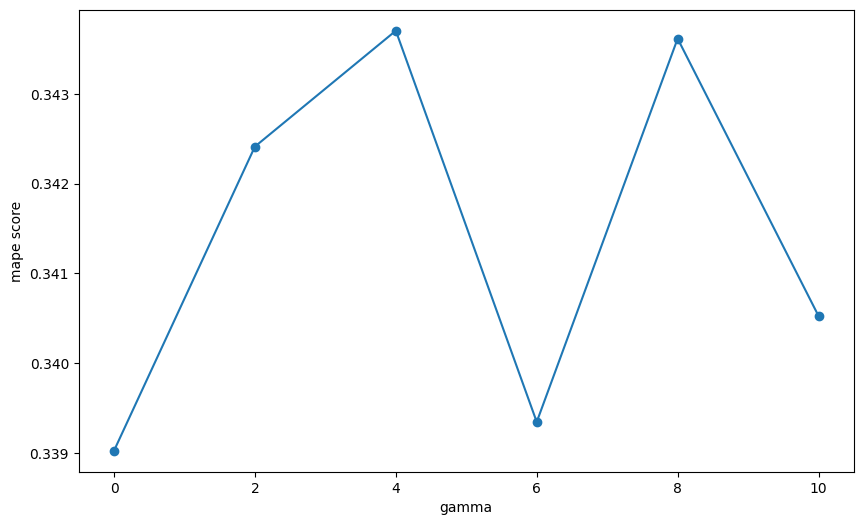

In [154]:
gamma=[0,2,4,6,8,10]
mape_scores=[]


for g in gamma:
    model_xgb=XGBRegressor(learning_rate=0.5,n_estimators=500,max_depth=6,gamma=g)
    pipeline_xgb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_xgb)])

    pipeline_xgb.fit(X_train, y_train)
    val_pred_xgb = pipeline_xgb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_xgb))
plt.figure(figsize=(10,6))
plt.plot(gamma,mape_scores,marker='o')
plt.xlabel('gamma')
plt.ylabel('mape score')
plt.show()

In [155]:
best_model_xgb=XGBRegressor(learning_rate=0.5,n_estimators=500,max_depth=6,gamma=0)
pipeline_xgb=Pipeline([('step1',encoder),('step2',normalization),('step3',best_model_xgb)])
pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3',
                 XGBRegressor(base_score=None, boos...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [156]:
test_pred_xgb=pipeline_xgb.predict(X_test)
mape_xgb=mean_absolute_percentage_error(y_test,test_pred_xgb)

In [157]:
mape_xgb

0.3143892579873267

In [158]:
y_test[10:20]

18586     368
7258      325
19202     814
20854     218
13206     350
20779     200
3611     1440
5133      800
37122    1139
28587     620
Name: Giá (triệu), dtype: int64

In [159]:
test_pred_xgb[10:20].reshape(-1,1)

array([[ 387.58713],
       [ 290.9814 ],
       [ 789.87897],
       [ 206.28595],
       [ 197.0547 ],
       [ 214.91083],
       [1336.7722 ],
       [ 799.948  ],
       [3609.4802 ],
       [ 598.8585 ]], dtype=float32)

## GradientBoosting

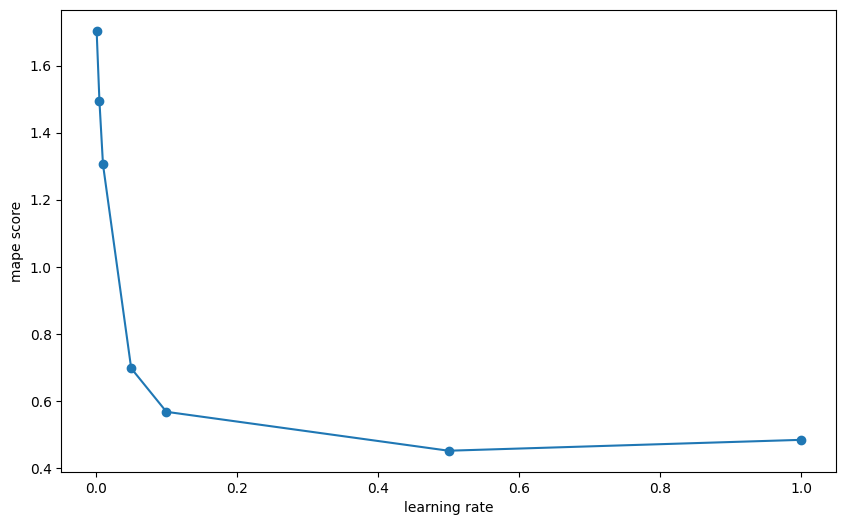

In [160]:
lr=[0.001,0.005,0.01,0.05,0.1,0.5,1]
mape_scores=[]


for i in lr:
    model_gb=GradientBoostingRegressor(learning_rate=i)
    pipeline_gb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_gb)])

    pipeline_gb.fit(X_train, y_train)
    val_pred_gb = pipeline_gb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_gb))
plt.figure(figsize=(10,6))
plt.plot(lr,mape_scores,marker='o')
plt.xlabel('learning rate')
plt.ylabel('mape score')
plt.show()

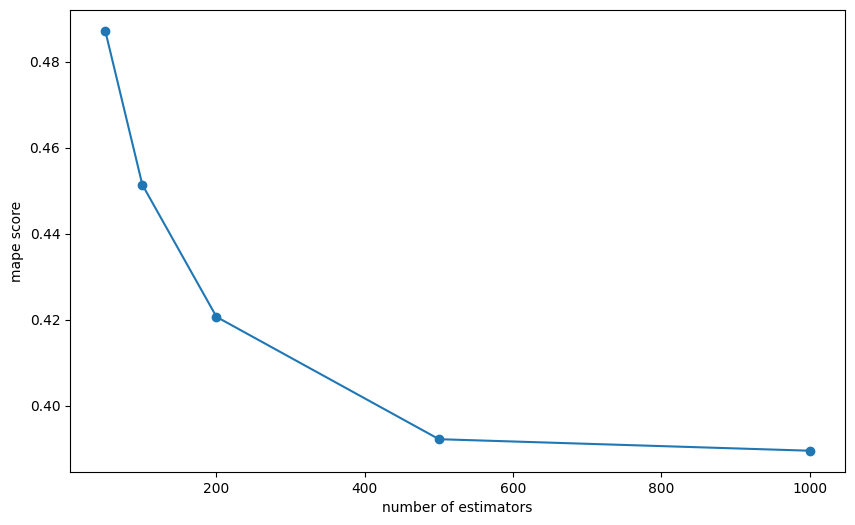

In [161]:
n_estimator=[50,100,200,500,1000]
mape_scores=[]


for tree in n_estimator:
    model_gb=GradientBoostingRegressor(learning_rate=0.5,n_estimators=tree)
    pipeline_gb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_gb)])

    pipeline_gb.fit(X_train, y_train)
    val_pred_gb = pipeline_gb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_gb))
plt.figure(figsize=(10,6))
plt.plot(n_estimator,mape_scores,marker='o')
plt.xlabel('number of estimators')
plt.ylabel('mape score')
plt.show()

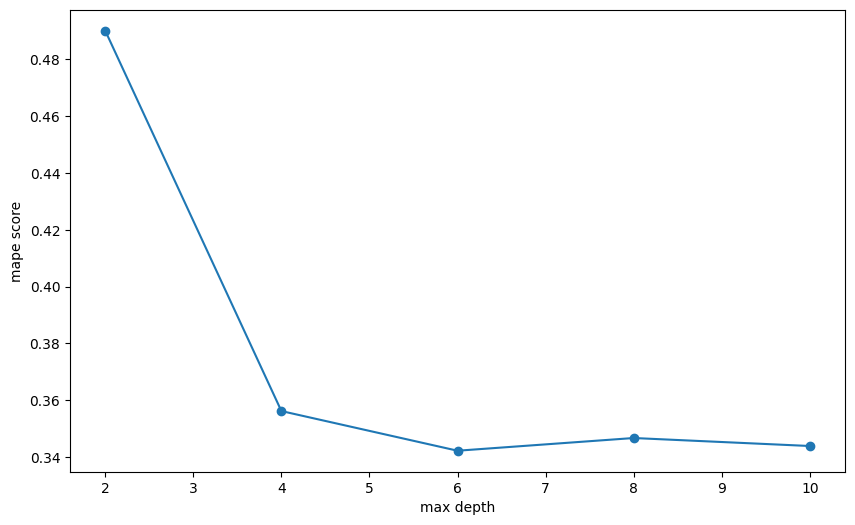

In [162]:
max_depth=[2,4,6,8,10]
mape_scores=[]


for depth in max_depth:
    model_gb=XGBRegressor(learning_rate=0.5,n_estimators=1000,max_depth=depth)
    pipeline_gb=Pipeline([('step1',encoder),('step2',normalization),('step3',model_gb)])

    pipeline_gb.fit(X_train, y_train)
    val_pred_gb = pipeline_gb.predict(X_val)

    # Calculate R2 score and mean absolute error
    mape_scores.append(mean_absolute_percentage_error(y_val,val_pred_gb))
plt.figure(figsize=(10,6))
plt.plot(max_depth,mape_scores,marker='o')
plt.xlabel('max depth')
plt.ylabel('mape score')
plt.show()

In [163]:
best_model_gb=GradientBoostingRegressor(learning_rate=0.5,n_estimators=1000,max_depth=6)
pipeline_gb=Pipeline([('step1',encoder),('step2',normalization),('step3',best_model_gb)])
pipeline_gb.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3',
                 GradientBoostingRegressor(learning_rate=0.5, max_depth=6,
                                           n_estimators=1000))])

In [164]:
test_pred_gb=pipeline_gb.predict(X_test)
mape_gb=mean_absolute_percentage_error(y_test,test_pred_gb)

In [165]:
mape_gb

0.3306102453647584

## Stacking Regressor

In [166]:
base_regressors = [('rf', best_model_rf), ('knn',best_model_knn ), ('xgb', best_model_xgb)]
model_stacking=StackingRegressor(estimators=base_regressors, final_estimator=LinearRegression())
pipeline_stacking=Pipeline([('step1',encoder),('step2',normalization),('step3',model_stacking)])

In [167]:
pipeline_stacking.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal encoding',
                                                  JamesSteinEncoder(), [8]),
                                                 ('nominal encoding',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 2, 3, 4, 5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalization',
                                                  StandardScaler(),
                                                  [1, 6, 7, 8])])),
                ('step3',
                 StackingRegressor(estimators=[('r...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=500,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                   final_estimator=LinearRegression()))])

In [168]:
test_pred_stacking=pipeline_stacking.predict(X_test)
mape_stacking=mean_absolute_percentage_error(y_test,test_pred_stacking)

## MLP

In [ ]:
model_mlp=MLPRegressor(hiden_layer_sizes=(32,64,16))
pipeline_mlp=Pipeline([('step1',encoder),('step2',normalization),('step3',model_mlp)])

In [ ]:
pipeline_mlp.fit(X_trai,y_train)

In [ ]:
test_pred_mlp=pipeline_mlp.predict(X_test)
mape_mlp=mean_absolute_percentage_error(y_test,test_pred_mlp)